<a href="https://colab.research.google.com/github/LongLongoooo/AIO_233/blob/AIO_Module_3/%5BProject%5DSentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s

Downloading...
From: https://drive.google.com/uc?id=1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s
To: /content/IMDB-Dataset.csv
100% 66.2M/66.2M [00:01<00:00, 51.7MB/s]


**Import Library**

In [2]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.4 MB/s eta 0:00:00


In [3]:
import re
import string
import nltk
nltk.download ("stopwords")
nltk.download ("wordnet")
from nltk . corpus import stopwords
from nltk . stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Read Data**

In [7]:
import pandas as pd
df = pd.read_csv("/content/IMDB-Dataset.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
df = df.drop_duplicates()
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


# **Cleaning data**

In [10]:
stop = set(stopwords.words("english"))

# Expanding  contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):
    # Remove HTML tags
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = expand_contractions(text) #Expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile("["
                              u"\ U0001F600 -\ U0001F64F " # emoticons
                              u"\ U0001F300 -\ U0001F5FF " # symbols & pictographs
                              u"\ U0001F680 -\ U0001F6FF " # transport & map symbols
                              u"\ U0001F1E0 -\ U0001F1FF " # flags (iOS)
                              u"\ U00002702 -\ U000027B0 "
                              u"\ U000024C2 -\ U0001F251 "
                              "]+", flags =re. UNICODE )

    text = emoji_clean.sub(r" ", text)
    text = re.sub (r"\.(?=\ S)", ". ",text ) #add space after full stop
    text = re.sub(r"http/S+","", text) #remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation and make text lowercase
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #remove stopwords and lemmatize
    return text

df["review"] = df["review"].apply(preprocess_text)
df["review"]

<ipython-input-10-ebed54d04be8>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review
0,one reviewer mentioned watching oz episode hoo...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,asically family little boy jake think zombie c...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job creative original...
49996,ad plot bad dialogue bad acting idiotic direct...
49997,atholic taught parochial elementary school nun...
49998,going disagree previous comment side maltin on...


# **Analysing Data**

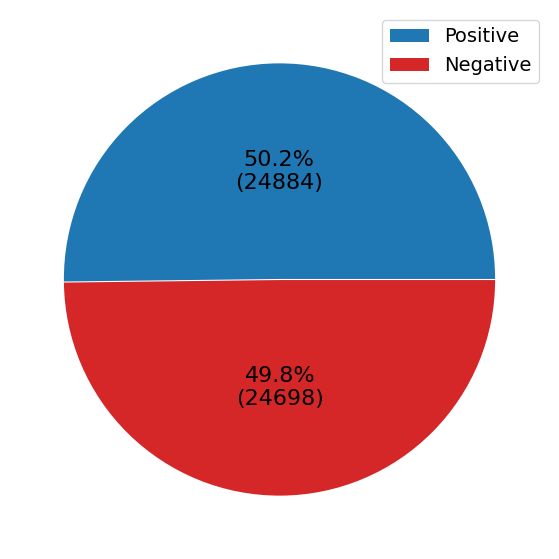

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df["sentiment"] == "positive"])
freq_neg = len(df[df["sentiment"] == "negative"])

data = [freq_pos, freq_neg]

labels = ["Positive", "Negative"]

# Creating plot
pie, ax = plt.subplots(figsize=[11, 7])

plt.pie(x=data, autopct=lambda pct:func(pct, data), explode=[0.0025]*2,
        pctdistance=0.5, colors=[sns.color_palette()[0], "tab:red"], textprops={"fontsize":16})
#plt.title("Freqentcies of sentiment labels", fontsize=14, fontweight="bold")

labels = [r"Positive", r"Negative"]
plt.legend(labels, loc="best", prop={"size": 14})
pie.savefig("Piechart.png")
plt.show()

# **Measuring length of every sample in every class**

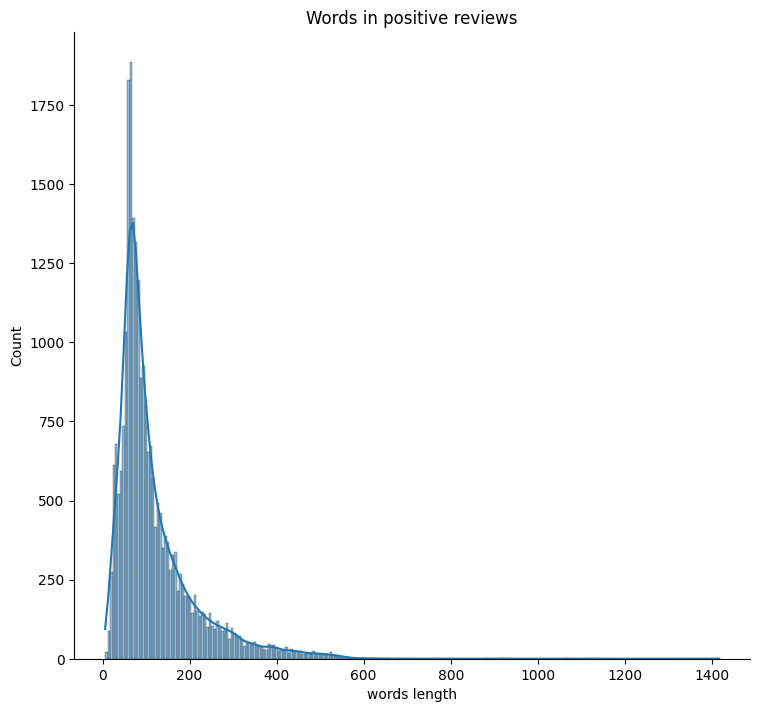

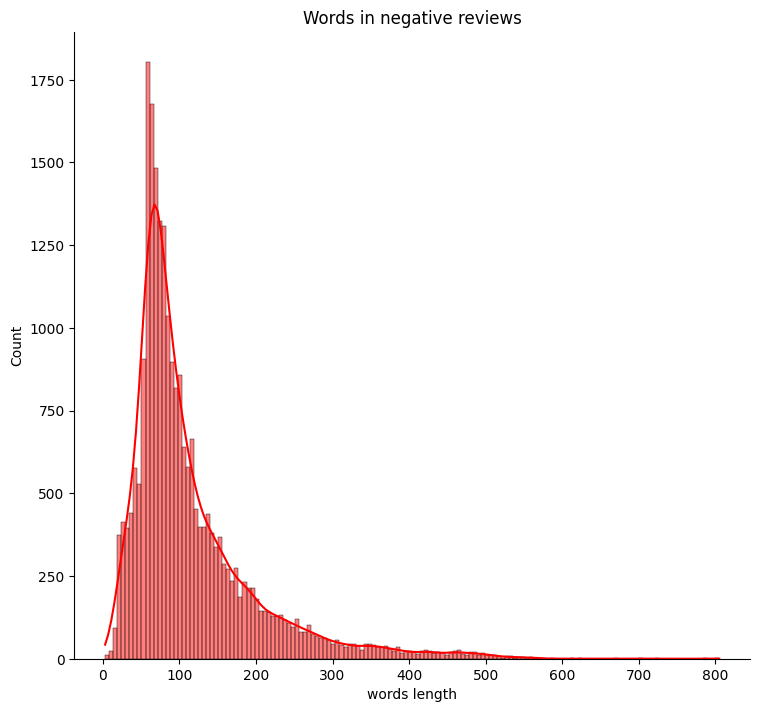

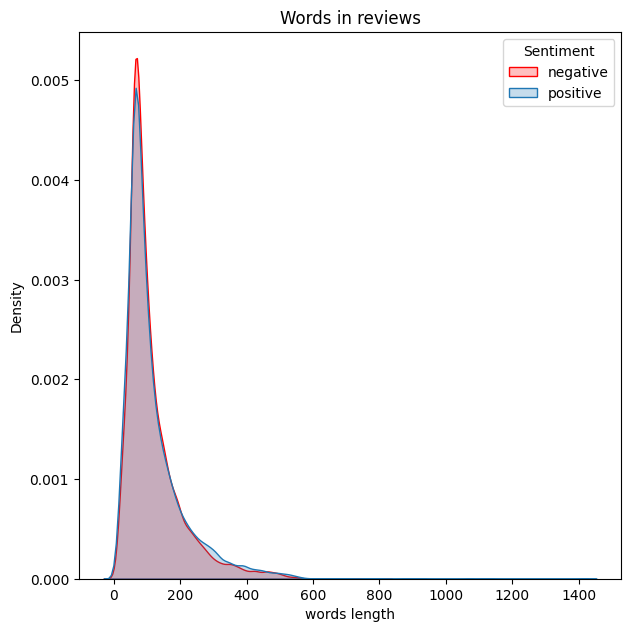

In [12]:
words_len = df["review"].str.split().map(lambda x:len(x))
df_temp = df.copy ()
df_temp ["words length"] = words_len

hist_positive = sns.displot (
data = df_temp [ df_temp ["sentiment"] == "positive"],
x="words length", hue="sentiment", kde=True , height =7, aspect =1.1 , legend =
False). set ( title ="Words in positive reviews")
plt.show (hist_positive )

hist_negative = sns.displot (
data = df_temp [ df_temp ["sentiment"] == "negative"],
x="words length", hue="sentiment", kde=True , height =7, aspect =1.1 , legend =False , palette =["red"]). set ( title = "Words in negative reviews")
plt.show ( hist_negative )

plt . figure ( figsize =(7 ,7.1) )
kernel_distibution_number_words_plot = sns. kdeplot (
data = df_temp , x="words length", hue="sentiment", fill =True , palette =[ sns .
color_palette()[0], "red"]). set ( title ="Words in reviews")
plt . legend (title ="Sentiment", labels =["negative", "positive"])
plt . show ( kernel_distibution_number_words_plot )

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df["sentiment"])
print(y_data[:5])
x_data = df["review"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

[1 1 1 0 1]


# **Vectorizing data**

In [16]:
tfidf_vectorizer = TfidfVectorizer ( max_features =100000)
tfidf_vectorizer .fit ( x_train , y_train )

x_train_encoded = tfidf_vectorizer . transform ( x_train )
x_test_encoded = tfidf_vectorizer . transform ( x_test )


In [17]:
x_train_encoded.shape

(39665, 100000)

# **Train and Evaluate Model**

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier (criterion="entropy",random_state =42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8457194716143995
